In [12]:
#vezan na sifAniSvm1
#DELUJE------------------------------DELUJE---------------

import cv2
import numpy as np
import os
import pylab as pl
from sklearn.metrics import confusion_matrix, accuracy_score #sreeni
from sklearn.externals import joblib

In [13]:
# Load the classifier, class names, scaler, number of clusters and vocabulary 
#from stored pickle file (generated during training)
clf, classes_names, k, voc = joblib.load("ubpolcnnpop.pkl")


In [14]:
# Get the path of the testing image(s) and store them in a list
#test_path = 'dataset/test' # Names are Aeroplane, Bicycle, Car
test_path = 'iriseye1/test'  # Folder Names are Parasitized and Uninfected
#instead of test if you use train then we get great accuracy

testing_names = os.listdir(test_path)


In [15]:
# Get path to all images and save them in a list
# image_paths and the corresponding label in image_paths
image_paths = []
image_classes = []
class_id = 0

#To make it easy to list all file names in a directory let us define a function
#
def imglist(path):
    return [os.path.join(path, f) for f in os.listdir(path)]

#Fill the placeholder empty lists with image path, classes, and add class ID number

for testing_name in testing_names:
    dir = os.path.join(test_path, testing_name)
    class_path = imglist(dir)
    image_paths+=class_path
    image_classes+=[class_id]*len(class_path)
    class_id+=1
# Create List where all the descriptors will be stored
des_list = []

In [16]:
# SIFT. ORB also works but didn;t work well for this example
sift = cv2.xfeatures2d.SIFT_create()

sift = cv2.xfeatures2d.SIFT_create()

for image_path in image_paths:
	im = cv2.imread(image_path)
	img = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
	# Adaptive Gaussian Thresholding
	#th1 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
	# Otsu's thresholding
	#ret2,th2 = cv2.threshold(th1,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
	# Otsu's thresholding after Gaussian filtering
	#blur = cv2.GaussianBlur(th2,(5,5),0)
	#ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
	#img = img.astype('uint8')
	kpts, des = sift.detectAndCompute(img, None)
	des_list.append((image_path, des))

In [17]:
# Calculate the histogram of features
#vq Assigns codes from a code book to observations.
from scipy.cluster.vq import vq    
test_features = np.zeros((len(image_paths), k), "float32")
for i in range(len(image_paths)):
    words, distance = vq(des_list[i][1],voc)
    for w in words:
        test_features[i][w] += 1


true_class =['2', '2', '2', '2', '2', '2', '3', '3', '3', '3', '3', '3', '4', '4', '4', '4', '4', '4', '5', '5', '5', '5', '5', '5', '6', '6', '6', '6', '6', '6', '1', '1', '1', '1', '1', '1']
prediction =['2', '2', '3', '2', '2', '1', '3', '3', '3', '1', '3', '3', '4', '4', '2', '4', '4', '2', '5', '5', '5', '5', '5', '5', '6', '5', '6', '6', '6', '5', '6', '1', '1', '1', '1', '1']
accuracy =  0.7777777777777778
[[5 0 0 0 0 1]
 [1 4 1 0 0 0]
 [1 0 5 0 0 0]
 [0 2 0 4 0 0]
 [0 0 0 0 6 0]
 [0 0 0 0 2 4]]


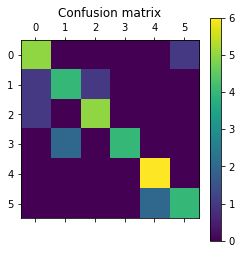

In [21]:
# Scale the features
#Standardize features by removing the mean and scaling to unit variance
#Scaler (stdSlr comes from the pickled file we imported)
#test_features = stdSlr.transform(test_features)

#######Until here most of the above code is similar to Train except for kmeans clustering####
from sklearn.preprocessing import StandardScaler
test_features = StandardScaler().fit_transform(test_features)

#Report true class names so they can be compared with predicted classes
true_class =  [classes_names[i] for i in image_classes]
# Perform the predictions and report predicted class names. 
predictions =  [classes_names[i] for i in clf.predict(test_features)]


#Print the true class and Predictions 
print ("true_class ="  + str(true_class))
print ("prediction ="  + str(predictions))

###############################################
#To make it easy to understand the accuracy let us print the confusion matrix

def showconfusionmatrix(cm):
    pl.matshow(cm)
    pl.title('Confusion matrix')
    pl.colorbar()
    pl.show()


accuracy = accuracy_score(true_class, predictions)
print ("accuracy = ", accuracy)
cm = confusion_matrix(true_class, predictions)
print (cm)

showconfusionmatrix(cm)